In [ ]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import re
import pandas as pd
from urllib.request import urlopen, urlretrieve
from urllib.parse import quote_plus

In [ ]:
driver = webdriver.Chrome('chromedriver.exe')

C:\Users\admin\AppData\Local\Temp\ipykernel_5820\530843676.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [ ]:
driver.get("https://www.instagram.com/accounts/login/" )


- 로그인 하기

In [ ]:
e = driver.find_elements(By.CLASS_NAME, '_aa48')

e[0].send_keys("heejin170@gmail.com")

e[1].send_keys("hjkk825zzang@!@")

e[0].send_keys(Keys.ENTER)

In [ ]:
e = driver.find_element(By.CLASS_NAME, '_ac8f')
e.click()
time.sleep(3)

e = driver.find_element(By.CLASS_NAME, '_a9-z')
e.click()

- 검색하기

In [ ]:
_keyword = '디저트추천' 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

In [ ]:
_keyword = '디저트' 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')
time.sleep(5)

insta_tag = []
count = 5000
#스크롤 내리기
driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
time.sleep(4)
driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
time.sleep(3)
driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
time.sleep(3)
#첫 번째 게시물 클릭하기
driver.find_element(By.CLASS_NAME, '_aagw').click()

time.sleep(3)
for i in range(count):
    try:#게시물 내용
        data = driver.find_element(By.CLASS_NAME, '_a9zs').text

        #태그만 뽑아내기
        tags = re.findall("#[A-Za-z0-9가-힣]+", data)
        tags = ''.join(tags).replace("#"," ")
        tags_data = tags.split()
        for tag in tags_data:
            insta_tag.append(tag)
    except:
        pass
        
    #다음 게시물로 이동
    driver.find_element(By.CLASS_NAME, '_abl-').send_keys(Keys.RIGHT) 
    time.sleep(1.5)

In [ ]:
insta_tag

[]

In [ ]:
#df = pd.DataFrame(insta_tag)        
#df.rename({0 : 'word'}, axis = 1, inplace = True)   
#df['count'] = df.iloc[:,0].str.len()
dff = df.query("word in['호두과자', '빼빼로', '허니브레드', '인절미', '토스트', '달고나', '호떡', '계란빵', '붕어빵', '꽈배기', '케이크', '비스킷', '푸딩', '쿠키', '프레첼', '팬케이크',\
'젤라또', '퐁듀', '모나카', '크로와상', '스콘', '크로플', '소금빵', '에그타르트', '크로크무슈', '와플', '치아바타', '츄러스', '아이스크림', '도넛', '휘낭시에', '도쿄롤',\
'마카롱', '머핀', '퀸아망', '시나몬롤', '모카번', '파운드', '마들렌', '식빵', '잠봉뵈르', '치즈타르트', '크럼블', '베이글', '샌드위치', '치즈케이크', \
'초코케이크', '딸기케이크', '초코머핀', '치즈머핀', '슈붕', '팥붕', '까눌레', '몬테크리스토', '브라우니', '크레페', '버터바', '다쿠아즈', '파이', '슈', '몽블랑', '비스킷', \
'티라미수', '크로칸슈', '크레이프', '오믈렛','머랭쿠키', '카야토스트', '빨미까레','러스크', '카이막', '누네띠네']")


In [ ]:
dff.groupby('word', as_index = False).agg('count').sort_values('count', ascending = False)

,word,count
34,케이크,66
35,쿠키,45
50,휘낭시에,43
9,마카롱,38
21,스콘,36
8,마들렌,25
18,빼빼로,24
25,에그타르트,24
3,다쿠아즈,20
19,샌드위치,17


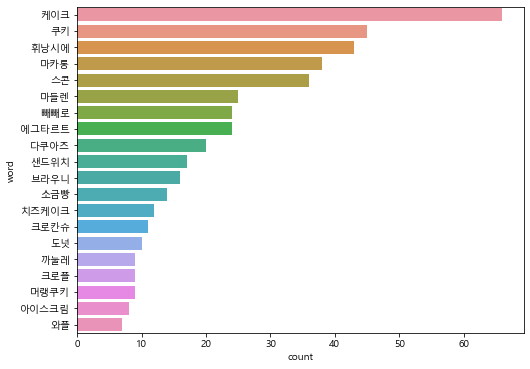

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'             
plt.rcParams.update({'figure.figsize' :  [8,6] })              

top20 = dff.groupby('word', as_index = False).agg('count').sort_values('count', ascending = False)[:20]
sns.barplot(data = top20, y = 'word', x = 'count')    
plt.show()

In [ ]:
top = df.groupby('word', as_index = False).agg('count').sort_values('count', ascending = False)
dict_word = top.set_index('word').to_dict()['count'] 

In [ ]:
from wordcloud import WordCloud
import platform

In [ ]:
wc  = WordCloud(font_path = 'malgunbd.ttf',
               background_color = 'white')

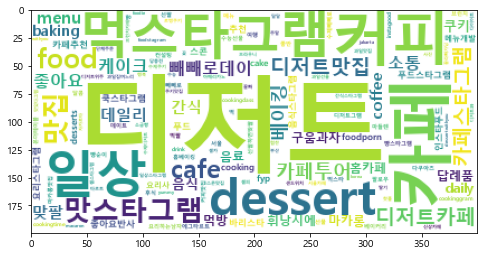

In [ ]:
img = wc.generate_from_frequencies(dict_word)
plt.imshow(img)

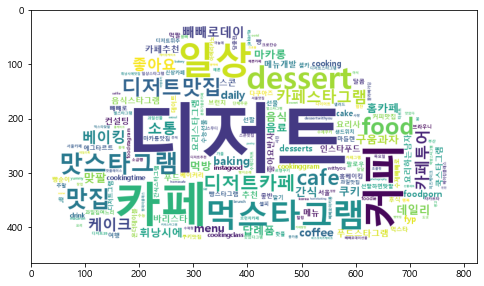

In [ ]:
import PIL
icon = PIL.Image.open('cloud.png')

import numpy as np
img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

 

wc = WordCloud(font_path = 'malgunbd.ttf',
               background_color = 'white',
              mask = img)
img_wordcloud = wc.generate_from_frequencies(dict_word)
plt.imshow(img_wordcloud)

[]